# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [3]:
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
training_set = training_data.iloc[:, 1:2].values

In [8]:
training_set.shape, training_data.shape

((1258, 1), (1258, 6))

In [10]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [11]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [12]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, 1257):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92493861, 0.92106928, 0.92438053, ..., 0.96123223, 0.95475854,
        0.95204256],
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128]])

In [14]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95163331, 0.95725128,
       0.93796041])

In [15]:
x_train.shape

(1197, 60)

In [16]:
# reshaping dataset
x_train = x_train.reshape(1197, 60, 1)

In [17]:
x_train.shape

(1197, 60, 1)

# Step 3: Building LSTM

In [18]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [19]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

c:\Users\91960\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 60)         │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 60)         │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 80)         │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 80)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,641 (725.16 KB)

 Trainable params: 185,641 (725.16 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Training the model

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - loss: 0.1484
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - loss: 0.0085
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0069
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0072
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0048
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0047
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0054
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0044
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0051
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - loss: 0.0044
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0045
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0039
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0038
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0036
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s

# Step 5: Making Predictions

In [25]:
# getting the real stock prices of month Nov 2019
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [27]:
test_data.shape

(20, 6)

In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [29]:
real_stock_price = test_data.iloc[:, 1:2].values

In [30]:
real_stock_price.shape

(20, 1)

In [31]:
# Getting predicted stock prices of month Nov 2019

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

x_test = []
for i in range(60, 80):
  x_test.append(inputs[i-60:i, 0])

# convert in numpy array
x_test = np.array(x_test)

# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step


In [34]:
print(predicted_stock_price[8]), print(real_stock_price[8])

[777.6036]
[807.48]


(None, None)

# Step 6: Visualization

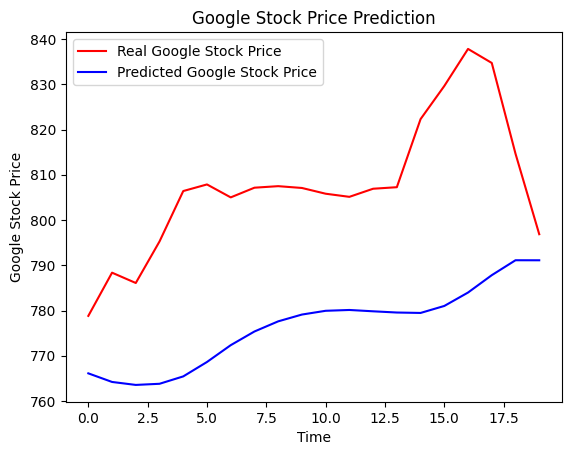

In [35]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()